In [89]:
# load dependencies
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path as path
import pandas as pd
from scipy.io import loadmat as loadmat

# Read Files from MAT file


In [90]:
# Define the current working directory
wd = path.cwd()
# one level up
pwd = wd.parent
print(f"Parent working directory: {pwd}")

# Define the data path
data_path = pwd / "raw data"
ocv_data = data_path / "raw_data_b"
data_OCV = loadmat(str(ocv_data))

Parent working directory: /mnt/c/Users/wwwsp/Battery Systems/PYTHON/RC Model


In [91]:
# Display the type of the loaded data
print(type(data_OCV))
# Display the keys in the loaded data
print(data_OCV.keys())
data_struct = data_OCV['MeasVal']

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'MeasVal'])


In [92]:
test_time=data_struct['Test_Time']
OCV=data_struct['U_Batt_AV']
I_data = data_struct['I_Batt_AV']
step_time = data_struct['Step_Time']
SOC= data_struct['Batt_SOC_AV']
temperature = data_struct['T_Batt_AV']
capacity=data_struct['Batt_Cap_AV']

print(type(test_time))
print(type(OCV))
print(type(I_data))
print(type(step_time))

print(np.shape(test_time))
print(np.shape(OCV))
print(np.shape(I_data))
print(np.shape(step_time))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 1)
(1, 1)
(1, 1)
(1, 1)


In [93]:
 # Unwrap the nested arrays
test_time_array = test_time[0, 0]
ocv_array = OCV[0, 0]
current_array = I_data[0, 0]
step_time = step_time[0,0]
SOC=SOC[0,0]
T=temperature[0,0]
capacity = capacity[0,0]

# Flatten the arrays to 1D
test_time_flat = test_time_array.flatten() # .flatten() converts to 1D array
ocv_flat = ocv_array.flatten()
current_array_flat = current_array.flatten()
step_time_flat = step_time.flatten()
SOC_flat = SOC.flatten()
T_flat = T.flatten()
capacity_flat = capacity.flatten()
battery_capacity = capacity_flat[0]  # Assuming capacity is a single value

In [94]:
# Create a DataFrame from the data
df = pd.DataFrame({
    'Test_Time': test_time_flat,
    'OCV': ocv_flat,
    'Current': current_array_flat,
    'Step_Time': step_time_flat,
    'SOC': SOC_flat,
    'Temperature': T_flat,
    'Capacity': battery_capacity
}) # assuming OCV has the same structure# Should be a list or array

In [95]:
df.head()  # Display the first few rows of the DataFrame

,Test_Time,OCV,Current,Step_Time,SOC,Temperature,Capacity
0,0.000,3.356148,0.0,0.000,100.0,25.0,115.010177
1,0.500,3.356148,0.0,0.500,100.0,25.1,115.010177
2,1.000,3.356444,0.0,1.000,100.0,24.9,115.010177
3,61.001,3.356148,0.0,58.964,100.0,25.0,115.010177
4,121.002,3.356148,0.0,118.965,100.0,25.0,115.010177


/tmp/ipykernel_211152/1721665439.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipykernel_211152/1721665439.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right', fontsize=12)


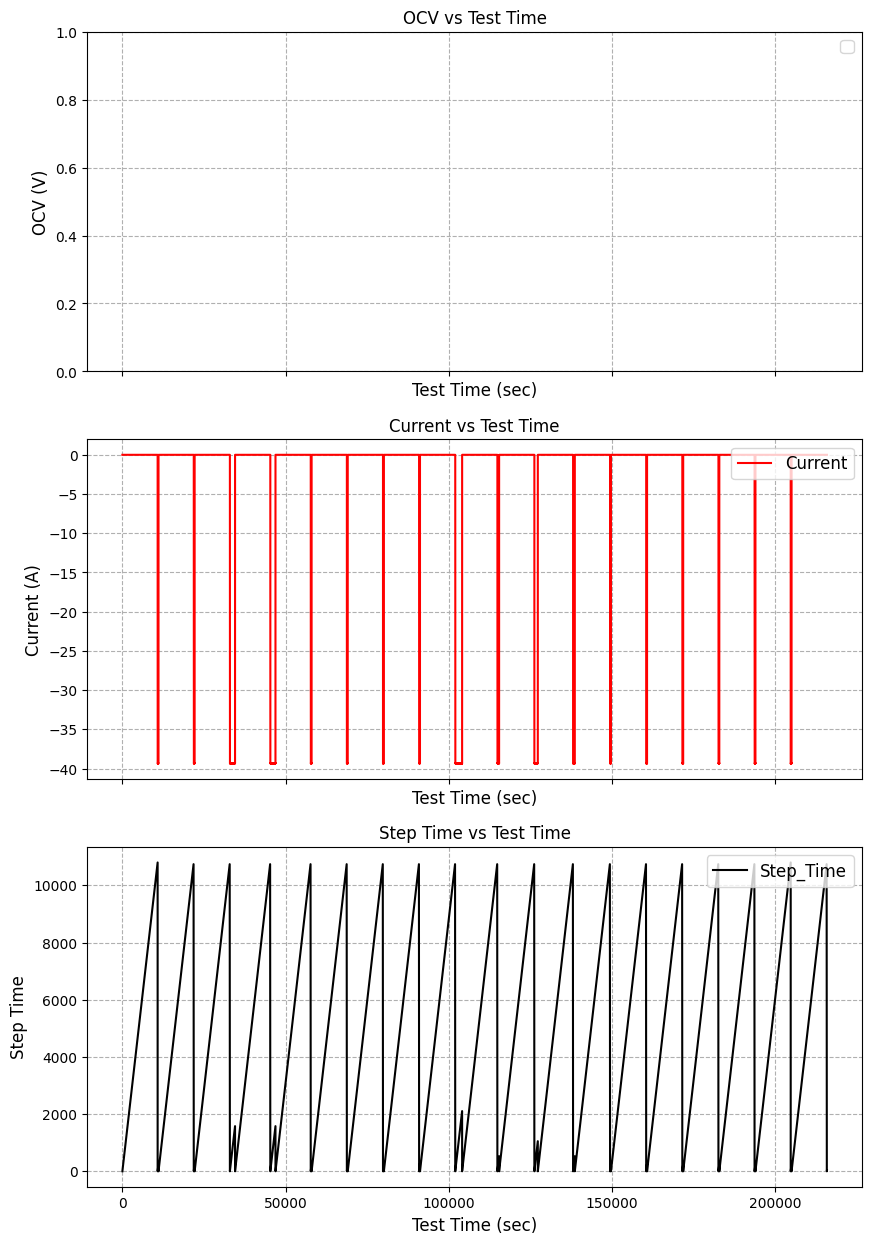

<Figure size 640x480 with 0 Axes>

In [96]:
# Plotting the data for voltage and current

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15), dpi=100, sharex=True)
ax1.set_xlabel('Test Time (sec)', fontsize=12)
ax1.set_ylabel('OCV (V)',fontsize=12)
ax1.set_title('OCV vs Test Time',fontsize=12)
ax1.legend()
ax1.legend(loc='upper right', fontsize=12)
ax1.grid(True, linestyle='--', alpha=1)

ax2.plot(df['Test_Time'], df['Current'], label='Current', color='red')
ax2.set_xlabel('Test Time (sec)', fontsize=12)
ax2.set_ylabel('Current (A)',fontsize=12)
ax2.set_title('Current vs Test Time',fontsize=12)
ax2.legend()
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(True, linestyle='--', alpha=1)

ax3.plot(df['Test_Time'], df['Step_Time'], label='Step_Time', color='black')
ax3.set_xlabel('Test Time (sec)', fontsize=12)
ax3.set_ylabel('Step Time',fontsize=12)
ax3.set_title('Step Time vs Test Time',fontsize=12)
ax3.legend()
ax3.legend(loc='upper right', fontsize=12)
ax3.grid(True, linestyle='--', alpha=1)

plt.show()
plt.tight_layout()


In [97]:
threshold = 1.0  # amps; tune depending on your signal

# Boolean mask: True = active pulse, False = rest
is_pulse = abs(df['Current']) > threshold

# Detect transitions
edges = np.diff(is_pulse.astype(int))
start_indices = np.where(edges == 1)[0] + 1   # pulse starts
end_indices   = np.where(edges == -1)[0] + 1  # pulse ends

# Align starts and ends
if len(end_indices) > 0 and end_indices[0] < start_indices[0]:
    end_indices = end_indices[1:]
n_pulses = min(len(start_indices), len(end_indices))
pulse_periods = list(zip(start_indices[:n_pulses], end_indices[:n_pulses]))

print("Detected pulses:", pulse_periods)

Detected pulses: [(np.int64(183), np.int64(451)), (np.int64(637), np.int64(903)), (np.int64(1089), np.int64(2671)), (np.int64(2858), np.int64(4440)), (np.int64(4627), np.int64(4893)), (np.int64(5080), np.int64(5347)), (np.int64(5534), np.int64(5801)), (np.int64(5988), np.int64(6255)), (np.int64(6442), np.int64(8551)), (np.int64(8739), np.int64(9269)), (np.int64(9457), np.int64(10514)), (np.int64(10702), np.int64(11233)), (np.int64(11422), np.int64(11690)), (np.int64(11879), np.int64(12147)), (np.int64(12336), np.int64(12605)), (np.int64(12795), np.int64(13064)), (np.int64(13254), np.int64(13524)), (np.int64(13714), np.int64(13986))]


In [98]:
rest_periods = []

# Before the first pulse
if start_indices[0] > 0:
    rest_periods.append((0, start_indices[0]))

# Between pulses
for i in range(n_pulses - 1):
    rest_periods.append((end_indices[i], start_indices[i + 1]))

# After the last pulse
if end_indices[-1] < len(df) - 1:
    rest_periods.append((end_indices[-1], len(df) - 1))

print("Rest periods:", rest_periods)


Rest periods: [(0, np.int64(183)), (np.int64(451), np.int64(637)), (np.int64(903), np.int64(1089)), (np.int64(2671), np.int64(2858)), (np.int64(4440), np.int64(4627)), (np.int64(4893), np.int64(5080)), (np.int64(5347), np.int64(5534)), (np.int64(5801), np.int64(5988)), (np.int64(6255), np.int64(6442)), (np.int64(8551), np.int64(8739)), (np.int64(9269), np.int64(9457)), (np.int64(10514), np.int64(10702)), (np.int64(11233), np.int64(11422)), (np.int64(11690), np.int64(11879)), (np.int64(12147), np.int64(12336)), (np.int64(12605), np.int64(12795)), (np.int64(13064), np.int64(13254)), (np.int64(13524), np.int64(13714)), (np.int64(13986), 14181)]


In [99]:
type(rest_periods)
rest_periods[1]

(np.int64(451), np.int64(637))

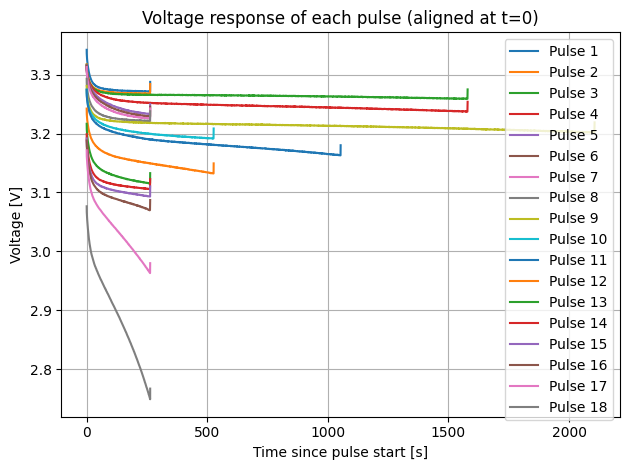

In [100]:
for i, (start_idx, end_idx) in enumerate(pulse_periods, start=1):
    t_seg = df.loc[start_idx:end_idx, 'Test_Time'].values
    v_seg = df.loc[start_idx:end_idx, 'OCV'].values

    # Shift time to start at zero for each pulse
    t_shifted = t_seg - t_seg[0]

    plt.plot(t_shifted, v_seg, label=f'Pulse {i}')

plt.xlabel("Time since pulse start [s]")
plt.ylabel("Voltage [V]")
plt.title("Voltage response of each pulse (aligned at t=0)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

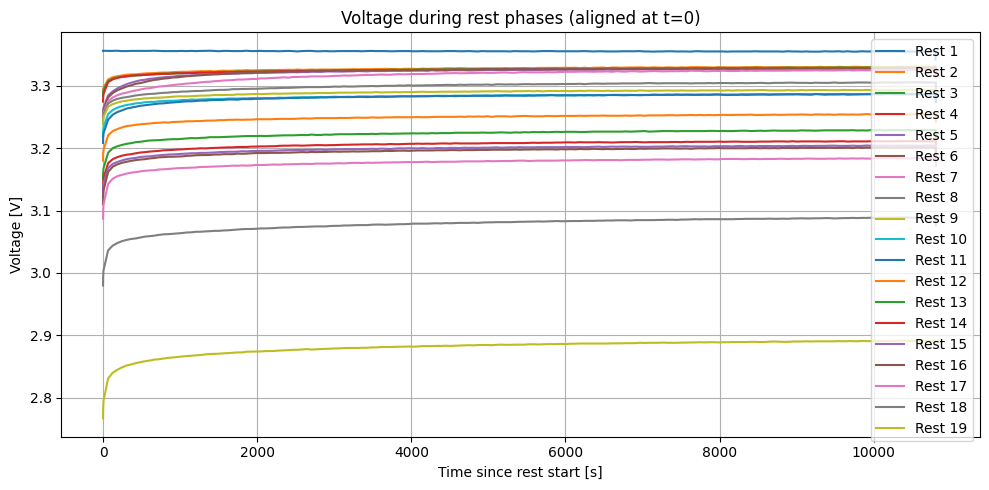

In [101]:
plt.figure(figsize=(10,5))

for i, (start_idx, end_idx) in enumerate(rest_periods, start=1):
    t_seg = df.loc[start_idx:end_idx, 'Test_Time'].values
    v_seg = df.loc[start_idx:end_idx, 'OCV'].values

    # Shift time so rest starts at 0
    t_shifted = t_seg - t_seg[0]

    plt.plot(t_shifted, v_seg, label=f'Rest {i}')


plt.xlabel("Time since rest start [s]")
plt.ylabel("Voltage [V]")
plt.title("Voltage during rest phases (aligned at t=0)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [102]:
# Initialize segment dictionary with list containers

segment_rest = { # thids is a dictionary to hold the segments of data
    'voltage': [],
    'time': [],
    'duration': [],
    'soc': [],
    'temp': [],
    'crate': [],
    'current_sign': []
 # Added duration to the segment dictionary

}

for i in range(len(rest_periods) - 1):
    start = rest_periods[i][0]
    end = rest_periods[i][1]

    voltage_segment = df['OCV'].iloc[start:end].values
    time_segment = df['Test_Time'].iloc[start:end].values
    soc_segment = df['SOC'].iloc[start:end].values
    temp_segment = df['Temperature'].iloc[start:end].values
    current_segment = df['Current'].iloc[start:end].values

    # Calculate the duration of the segment
    if len(time_segment) > 0:
        duration_segment = time_segment[-1] - time_segment[0]
    else:
        duration_segment = 0

    # Fill the segment dictionary
    segment_rest['voltage'].append(voltage_segment)
    segment_rest['time'].append(time_segment)
    segment_rest['duration'].append(time_segment - time_segment[0])
    segment_rest['soc'].append(soc_segment)
    segment_rest['temp'].append(round(np.mean(temp_segment)))
    segment_rest['crate'].append(abs(np.mean(current_segment) / battery_capacity))

    if np.mean(current_segment) / battery_capacity < 0:
        segment_rest['current_sign'].append(0)  # Discharge
    else:
        segment_rest['current_sign'].append(1)  # Charge

max_num_segments = len(segment_rest['voltage'])
print(f"Max number of rest segments: {max_num_segments}")


Max number of rest segments: 18


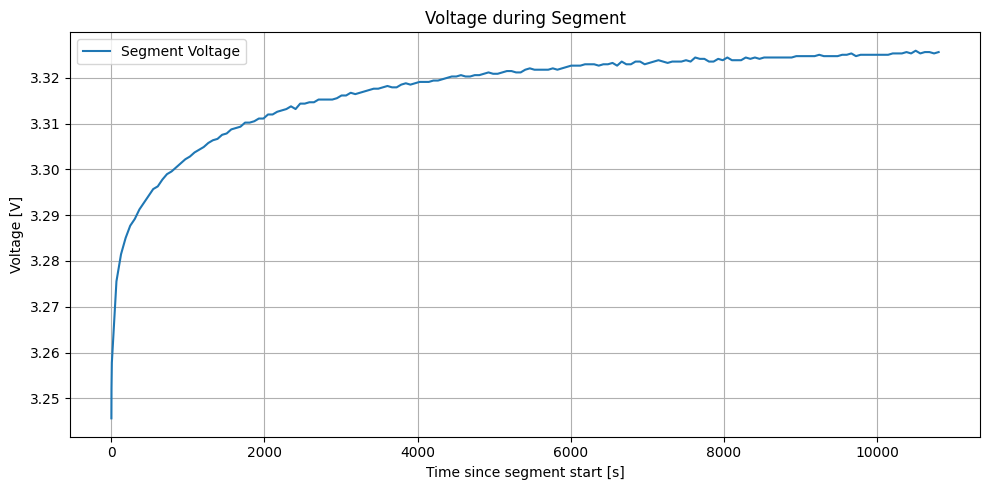

In [103]:
select_segment = 7
if select_segment > max_num_segments:
    raise ValueError(f"select_segment {select_segment} exceeds max_num_segments {max_num_segments}")

# Plotting one of the segments to verify
plt.figure(figsize=(10,5))
plt.plot(segment_rest['duration'][select_segment-1], segment_rest['voltage'][select_segment-1], label='Segment Voltage')
plt.xlabel("Time since segment start [s]")
plt.ylabel("Voltage [V]")
plt.title("Voltage during Segment")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [104]:
segment = {
    'voltage': [],
    'time': [],
    'duration': [],
    'soc': [],
    'temp': [],
    'crate': [],
    'current_sign': []
}

for i, (start, end) in enumerate(pulse_periods):
    voltage_segment = df['OCV'].iloc[start:end].values
    time_segment = df['Test_Time'].iloc[start:end].values
    soc_segment = df['SOC'].iloc[start:end].values
    temp_segment = df['Temperature'].iloc[start:end].values
    current_segment = df['Current'].iloc[start:end].values

    # Duration and shifted time
    duration_segment = time_segment[-1] - time_segment[0] if len(time_segment) > 0 else 0
    time_shifted = time_segment - time_segment[0]

    # Compute mean quantities
    temp_mean = round(np.mean(temp_segment), 2)
    crate_mean = abs(np.mean(current_segment) / battery_capacity)

    # Determine current direction
    current_sign = 1 if np.mean(current_segment) > 0 else 0  # discharge=1, charge=0

    # Fill pulse dictionary
    segment['voltage'].append(voltage_segment)
    segment['time'].append(time_shifted)
    segment['duration'].append(duration_segment)
    segment['soc'].append(soc_segment)
    segment['temp'].append(temp_mean)
    segment['crate'].append(crate_mean)
    segment['current_sign'].append(current_sign)

max_num_segments = len(segment['voltage'])
print(f"Total pulse segments extracted: {max_num_segments}")

Total pulse segments extracted: 18


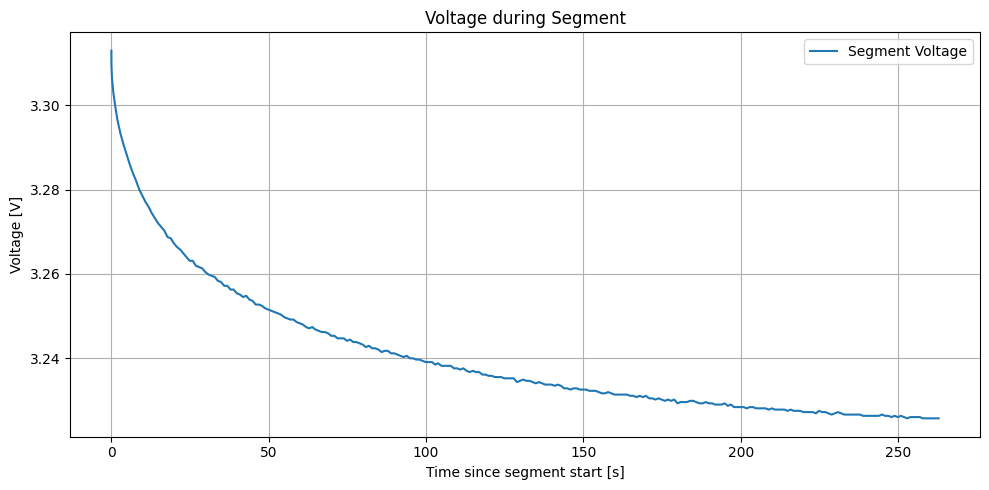

In [105]:
max_num_segments = len(segment['voltage'])
select_segment = 7
# Error check
if select_segment > max_num_segments:
    raise ValueError(f"select_segment {select_segment} exceeds max_num_segments {max_num_segments}")

plt.figure(figsize=(10,5))
plt.plot(segment['time'][select_segment-1], segment['voltage'][select_segment-1], label='Segment Voltage')
plt.xlabel("Time since segment start [s]")
plt.ylabel("Voltage [V]")
plt.title("Voltage during Segment")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [106]:
# convert segment_rest to dataframe
segment_rest_df = pd.DataFrame({
    'voltage': segment_rest['voltage'],
    'time': segment_rest['time'],
    'duration': segment_rest['duration'],
    'soc': segment_rest['soc'],
    'temp': segment_rest['temp'],
    'crate': segment_rest['crate'],
    'current_sign': segment_rest['current_sign']
})

# print for the first segment to verify
print(segment_rest_df.iloc[select_segment-1])

voltage         [3.24562962963, 3.24888888889, 3.25214814815, ...
time            [69044.72099999999, 69045.08299999998, 69046.1...
duration        [0.0, 0.3619999999937136, 1.3960000000079162, ...
soc             [59.9998504176, 59.9998504131, 59.9998504131, ...
temp                                                           25
crate                                                         0.0
current_sign                                                    1
Name: 6, dtype: object


In [107]:
# convert segment_rest to dataframe
segment_pulse_df = pd.DataFrame({
    'voltage': segment['voltage'],
    'time': segment['time'],
    'duration': segment['duration'],
    'soc': segment['soc'],
    'temp': segment['temp'],
    'crate': segment['crate'],
    'current_sign': segment['current_sign']
})

# print for the first segment to verify
print(segment_pulse_df.iloc[select_segment-1])

voltage         [3.31288888889, 3.30962962963, 3.30637037037, ...
time            [0.0, 0.013000000006286427, 0.1879999999946449...
duration                                                  262.848
soc             [59.9998503639, 59.9997934044, 59.9980839877, ...
temp                                                        25.06
crate                                                    0.341863
current_sign                                                    0
Name: 6, dtype: object
